# Assignment 2
### Understanding Uncertainty
### Due 9/12

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

In [2]:
liquorData = pd.read_csv("./data/iowa.csv")
liquorData.head()


,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00


In [3]:
# Clean data

print(liquorData.columns)

#print(liquorData["Item Description"].unique(), all)

#liquorData
#miniData = liquorData.groupby(["Item Description"]).sum(["Sale (Dollars)"])
#miniData

#miniData["Item Description"].unique()
indLiq = liquorData.groupby(["Item Description"])

indLiq['Profit Margin'] = indLiq[["State Bottle Cost", "Bottle Volume (ml)", "Bottles Sold"]].apply(
    lambda x: ((x["State Bottle Cost"] * x["Bottle Volume (ml)"]) * (x["Bottle Volume (ml)"] * x["Bottles Sold"])) - (x["Bottles Sold"] * x["State Bottle Cost"]) 
)

indLiq.head()

# sort by, descending >> just show the head of the dataframe


# FOR THIS PROBLEM, I AM DEFINING PROFIT AS FOLLOWS:

# [( state bottle cost / bottle volume ) * ( bottle volume * bottles sold)] - (bottles sold * state bottle cost) 

# unit price of a mL as paid by the customer ($/ml) * how many mL were sold = $ money paid by customers for total volume sold.
# subtract the amount of money paid to acquire the bottles (bottles sold * state bottle cost)

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Zip Code',
       'Category Name', 'Vendor Name', 'Item Number', 'Item Description',
       'Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail',
       'Bottles Sold', 'Sale (Dollars)'],
      dtype='object')


TypeError: 'DataFrameGroupBy' object does not support item assignment

In [ ]:
# make a plot of top liquors


2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [ ]:
# import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

In [ ]:
# x + y
# valueError : operands could not be broadcast together with shapes (3,) (2,)

x.reshape(-1,1) - y.reshape(1,-1)
""" returns:

array([ [-1, -4],
        [1, -2],
        [3, 0]])

"""

x.reshape(1,-1) - y.reshape(-1,1)
""" returns:

array([ [-1, 1, 3],
        [-4, -2, 0]])

"""

[[-1. -4.]
 [ 1. -2.]
 [ 3.  0.]]


In [ ]:
a = np.empty([3,2])
# replicating the above with for-loops (2x sets of nested for-loops)
for i in range(len(x)):
    for j in range(len(y)):
        a[i][j]= x[i] - y[j]

print(a) 

b = np.empty([2,3])
for i in range(len(y)):
    for j in range(len(x)):
        b[i][j] = x[j]-y[i]

print(b)

[[-1. -4.]
 [ 1. -2.]
 [ 3.  0.]]
[[-1.  1.  3.]
 [-4. -2.  0.]]


PROBLEM 2 (CONT): THE .reshape() FUNCTION IS ALTERING THE DIMENSIONS OF THE INPUT ARRAYS, TURNING THEM FROM 1-DIMENSIONAL ARRAYS TO 2-DIMENSIONAL ARRAY.  USING THE ARGUMENT -1 FOR A DIMENSION LEAVES IT TO THE OPPOSITE DIMENSION TO DETERMINE HOW MANY OF THAT DIMENSION TO USE

E.G., THE FIRST EXAMPLE x.reshape(-1,1) - y.reshape(1,-11)
- X IS RESHAPED INTO AN ARRAY WITH (-1) ROWS AND 1 COLUMNS >> 3 ROWS BECAUSE THERE ARE THREE ELEMENTS IN THE ARRAY
- Y IS RESHAPED INTO AN ARRAY WITH 1 ROW AND (-1) COLUMNS >> 2 COLUMNS  BECAUSE THERE ARE TWO ELEMENTS IN THE ARRAY
- WHEN Y IS SUBTRACTED FROM X, THE TWO "MATRICES" OF DIFFERENT DIMENSIONS CANNOT DO SIMPLE MATRIX SUBTRACTION, SO THEY BROADCAST INDIVIDUAL VALUES TO CREATE A DIFFERENCE MATRIX WITH 3 ROWS AND 2 COLUMNS (ROWS AS GIVEN BY THE MINUEND, COLUMNS BY THE SUBTRAHEND).

SAME BUT DIFFERENT IN THE SECOND EXAMPLE, x.reshape(1,-1) - y.reshape(-1,1)
- X BECOMES AN ARRAY WITH 1 ROW AND 3 COLUMNS
- Y BECOMES AN ARRAY WITH 2 ROWS AND 1 COLUMN
- THE DIFFERENCE MATRIX HAS 2 ROWS AND 3 COLUMNS (AS GIVEN BY THE SUBTRAHEND AND MINUEND, RESPECTIVELY--THE REVERSE OF EXAMPLE 1), VALUES OF X AND Y ARE BROADCAST

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

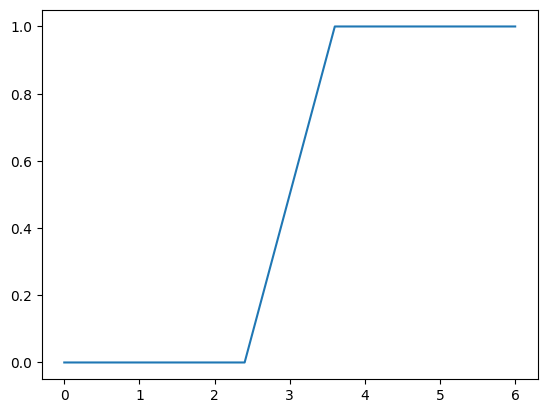

In [ ]:
#import numpy as np
import seaborn as sns

# plot indicator function:

# the following section is adapted from "01_visualizing_uncertainty_2.ipynb", typed out by hand to enforce
#       comprehension of each line / the process as a whole

x = 3 # set x-value
grid = np.linspace(x - 3, x + 3, 6) # create a grid
#ecdf = 0*grid.copy() # create space for the ECDF?

def funxnI(z, grid):
    # Indicator Function
    return z <= grid

sns.lineplot(x=grid, y=funxnI(x, grid))
plt.show()


In [ ]:
# 1-I{x <= z} == I{x > z} >> explain
"""
TO GIVE WORDS TO THE ABOVE DEFINITION, THE INDICATOR FUNCTION IS A BINARY FUNCTION.  FOR ANY GIVEN VALUE OF z,
THE RESULT IS 1 OR 0, DEPENDING ON THE VALUE OF x.

TO DEMONSTRATE THIS, x WILL BE ARBITRARILY ASSIGNED A VALUE OF 3.
WHEN z = 5, x <= 5, SO THE INDICATOR FUNCTION RESOLVES TO 1 >> I{x <= z} = 1 / I{x > z} = 0. PLUG THESE INTO THE EQUATION...
1 - I{x <= z} = I{x > z}
1 - 1 = 0
0 = 0

WHEN z = 0 , I{x > z} = 1 AND I{x <= z} = 0
1 - I{x <= z} = I{x > z}
1 - 0 = 1
1 = 1

"""

ValueError: x and y must have same first dimension, but have shapes (3,) and (1,)

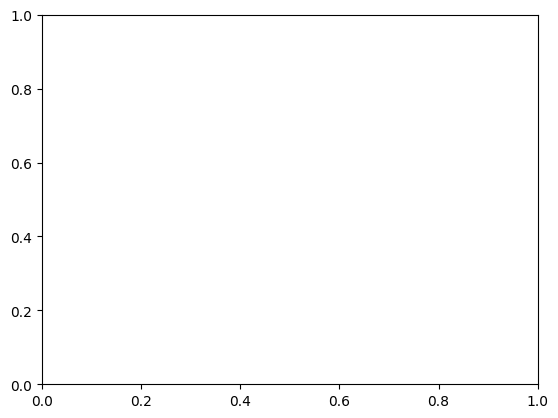

In [ ]:
rng = np.random.default_rng(100) # RANDOM NUMBER GENERATOR, SEED = 100

for N in (3,30,300,3000):
    X = rng.normal(0,1,N) # N unique values
    
    # ECDF plot goes here:

    #X = pd.DataFrame(X)
    #X = pd.Series(X)

    # X is a tuple of length N (x1, x2, x3) // (x1, x2, ..., x30) // etc.
    # N is a scalar value

    # from here, the following code section is adapted from "01_visualizing_uncertainty_2.ipynb", 
    #   typed out by hand to enforce comprehension of each line / the process as a whole
    grid = X
    #comparison = N.reshape(-1,1) <= X.reshape(1,-1)
    comparison = N <= X
    ecdf = np.mean(comparison, axis = 0)

    plt.plot(X,ecdf)
    plt.plot(f"Empirical CDF: N = {N}")
    plt.ylabel("Proportion")


# describe what happens to ECDF qualitatively as sample size N increases
"""
AS SAMPLE SIZE N INCREASES, THE ECDF BECOMES A SMOOTHER CURVE RATHER THAN A BUMPY/JAGGED CURVE.
"""

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [ ]:
# for the q-quantile >> rtfq. you don't need to calculate q quantiles, you just need to calculate THAT quantile.
def get_quantile(column, target): #input column is a Pandas series
                                    #target is the integer expression of percentile desired
    length = len(column)

    index = math.floor((target/100) * length)
    return column[index]

def get_iqr_whiskers(column): # input column is a Pandas series

    val25 = get_quantile(column, 25)

    val75 = get_quantile(column, 75)

    myIqr = val75 - val25
    whisker0 = val25 - (myIqr * 1.5)
    whisker100 = val75 + (myIqr * 1.5)

    return val25, val75, whisker0, whisker100, myIqr

def get_five_number_summary(column): # input column is a Pandas series

    temp_col = np.array(column)
    temp_col.sort()

    lengthb = len(temp_col)

    bot25, top75, botWhisker, topWhisker, theIqr = get_iqr_whiskers(temp_col)
    max = temp_col[lengthb-1]
    min = temp_col[0]
    medi = get_quantile(temp_col, 50)

    print(f"Min: {min} \n 0.25 Quantile: {bot25} \n Median: {medi} \n 0.75 Quantile: {top75} \n Max: {max}")
    print(f"Lower whisker: {botWhisker} \n Upper whisker: {topWhisker}")

def detect_outlier(column):

    temp_col = np.array(column)
    temp_col.sort()

    bot25, top75, botWhisker, topWhisker, theIqr = get_iqr_whiskers(temp_col)

    new_col = [True if (temp_col[i] < botWhisker) or (temp_col[i] > topWhisker) else False for i in range(len(temp_col))]
    # this list comprehension was autocompleted by Windsurf.  I had the idea and knew the conditions, Windsurf helped me with the syntax

    return new_col
    



In [ ]:
myData = pd.read_csv("./data/ForeignGifts_edu.csv")
#myData.head()
myData.describe() # the accepted answers
#myData.dtypes

,ID,OPEID,Foreign Gift Received Date,Foreign Gift Amount
count,28221.00000,2.822100e+04,28221.000000,2.822100e+04
mean,14111.00000,2.487055e+05,42875.689061,5.882327e+05
std,8146.84531,3.009704e+05,641.917904,3.222011e+06
min,1.00000,1.020000e+05,41640.000000,-5.377700e+05
25%,7056.00000,1.315000e+05,42336.000000,5.700000e+03
50%,14111.00000,2.077000e+05,42934.000000,9.461500e+04
75%,21166.00000,2.974000e+05,43466.000000,3.761420e+05
max,28221.00000,4.279700e+06,44012.000000,1.000000e+08


In [ ]:
# I'M GOING TO RUN MY FUNCTIONS ON THE COLUMN "Foreign Gift Amount"

#type(myData["Foreign Gift Amount"]) >> it's a Pandas series

dataCopy = np.array(myData["Foreign Gift Amount"])
#type(dataCopy) >> it's a NumPy array, as desired
dataCopy.sort()


get_five_number_summary(dataCopy)


Min: -537770 
 0.25 Quantile: 5700 
 Median: 94615 
 0.75 Quantile: 376142 
 Max: 99999999
Lower whisker: -549963.0 
 Upper whisker: 931805.0


In [ ]:
# detect outliers

outlierMask = detect_outlier(dataCopy)
print(outlierMask)

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?